In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import datetime as date

In [4]:
#criando um dicinário
data = {'year': [
                  2010 , 2011 , 2012 ,
                  2010 , 2011 , 2012 ,
                  2010 , 2011 , 2012
        ],
        'team': [
                  'FCBarcelona', 'FCBarcelona' ,
                  'FCBarcelona', 'RMadrid',
                  'RMadrid', 'RMadrid',
                  'ValenciaCF', 'ValenciaCF',
                  'ValenciaCF' 
        ],
        'wins' : [30 , 28, 32, 29, 32, 26, 21, 17, 19] ,
        'draws' : [6, 7, 4, 5, 4, 7, 8, 10, 8],
        'losses' : [2, 3, 2, 4, 2, 5, 9, 11, 11]
        }

#criando um dataframe Pandas com um dicionário
football = pd. DataFrame (data , columns = [
                  'year', 'team', 'wins', 'draws', 'losses'
                  ])

In [5]:
football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


In [6]:
#lendo um arquivo csv e convertendo num DataFrame
edu = pd.read_csv("dados/educ_figdp_1_Data.csv",
                  na_values = ':',
                  usecols = ["TIME","GEO","Value"])


edu.describe() # resumo estatistico
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [9]:
#slicing
edu['Value'] # retorna determinada coluna
edu[10:14] # retorna determinados indices

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


In [ ]:
#The loc and iloc methods are used to select rows or columns based on index or label.
#loc: select rows or columns using labels
#iloc: select rows or columns using indices


edu.iloc[3:5, :] #rows 3 and 4, all columns
edu.loc[3:5, :] #index 3, 4, 5 all columns

edu.loc[90:94, ['TIME', 'GEO']] # index 90 ao 94 seleciona colunas especificas

In [10]:
#filtering
edu[edu.Value > 6.5]
edu[edu.GEO > "Belgium"] # Only the names that come after "Belgium" in alphabetical order are selected.
edu[(edu.GEO == "Finland") & (edu.Value > 6)] 
edu[(edu.GEO == "Finland") | (edu.GEO == "France")] 

,TIME,GEO,Value
192,2000,France,6.04
193,2001,France,5.95
194,2002,France,5.90
195,2003,France,5.92
196,2004,France,5.80
197,2005,France,5.67
198,2006,France,5.61
199,2007,France,5.62
200,2008,France,5.62
201,2009,France,5.90


In [14]:
cities = ["France", "Finland", "Germany", "Greece"]
edu[edu.GEO.isin(cities)]
edu[edu.GEO.str.startswith("G")]
edu[edu.GEO.str.contains("st")]

,TIME,GEO,Value
144,2000,Estonia,5.57
145,2001,Estonia,5.24
146,2002,Estonia,5.47
147,2003,Estonia,5.29
148,2004,Estonia,4.92
149,2005,Estonia,4.88
150,2006,Estonia,4.70
151,2007,Estonia,4.72
152,2008,Estonia,5.61
153,2009,Estonia,6.03


In [15]:
# Tilde (~): The tilde operator is used for “not” logic in filtering
edu[~edu.GEO.isin(cities)]

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
367,2007,Slovakia,3.62
368,2008,Slovakia,3.61
369,2009,Slovakia,4.09
370,2010,Slovakia,4.22


In [16]:
edu.query('GEO == "Slovakia" and Value > 4')
edu.nlargest(3,"Value") # n maiores valores na coluna "Value"
edu.nsmallest(3,"Value")  # n menores valores na coluna "Value"

,TIME,GEO,Value
336,2000,Romania,2.88
347,2011,Romania,3.07
259,2007,Luxembourg,3.15


In [17]:
edu[edu.Value.isnull()].head() #filter rows with missing value

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


In [19]:
# Manipulating data

edu.Value.max()

s = edu["Value"]/100 # manipulando todos os dados de uma coluna
s. head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

In [20]:
s = edu.Value.apply(np.sqrt) # outra forma de manipulação de dados de uma coluna utilizando o método apply
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

In [21]:
s = edu.Value.apply(lambda d: d**2)
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

In [27]:
edu["newColumn"] = edu.Value / edu.Value.max() # criando uma nova coluna manipulando de outras colunas
edu

,TIME,GEO,Value,newColumn
0,2000,European Union (28 countries),NaN,NaN
1,2001,European Union (28 countries),NaN,NaN
2,2002,European Union (28 countries),5.00,0.567537
3,2003,European Union (28 countries),5.03,0.570942
4,2004,European Union (28 countries),4.95,0.561862
...,...,...,...,...
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526


In [28]:
#drop function removes the indicated rows if axis=0, or the indicated columns if axis=1
edu.drop("newColumn", axis = 1, inplace = True ) #inplace True apaga os dados de  verdade ao contrario de False que apaga uma cópia
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [29]:
edu = edu.append ({"TIME": 2000 ,"Value": 5.00 ,"GEO": "Brazil"}, ignore_index = True ) #add linha com valores
edu. tail ()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,Brazil,5.00


In [30]:
edu.drop(max(edu.index), axis = 0, inplace = True) #remove ultima linha
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [31]:
eduDrop = edu[~edu.Value.isnull()] #remove valor nulos (~) inverte ordem

In [32]:
edudrop = edu.dropna(subset=['Value'], inplace=False) # removendo usando função dropna

edudrop = edu.dropna(how='any', inplace=False) # set the how keyword to any to drop all values na

edufill = edu.fillna(value={"Value": 0}) # preenche com zero todos os valores NA na coluna Value

edufill

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [35]:
#sorting
edudrop.sort_values(by='Value', ascending= False) # Ordenação Ascending True inverte ordem
edudrop.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


In [36]:
#grouping data
group = edu[["GEO", "Value"]].groupby("GEO").mean() # agrupa as coluna com a media
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


In [42]:
edu.sort_values(by='Value', ascending= False).groupby("GEO").first().head()   # agrupado os paises e obtido maior value

,TIME,Value
GEO,,
Austria,2009,5.98
Belgium,2010,6.58
Bulgaria,2009,4.58
Cyprus,2009,7.98
Czech Republic,2011,4.51


In [43]:
edu.groupby('GEO').get_group('Bulgaria')

,TIME,GEO,Value
96,2000,Bulgaria,3.88
97,2001,Bulgaria,3.70
98,2002,Bulgaria,3.94
99,2003,Bulgaria,4.09
100,2004,Bulgaria,4.40
101,2005,Bulgaria,4.25
102,2006,Bulgaria,4.04
103,2007,Bulgaria,3.88
104,2008,Bulgaria,4.44
105,2009,Bulgaria,4.58


In [45]:
edu.groupby('GEO')[['Value']].sum().head()

,Value
GEO,
Austria,67.42
Belgium,68.08
Bulgaria,49.12
Cyprus,84.28
Czech Republic,50.02


In [47]:
edu.groupby("GEO").agg(["max","mean"]).head()

TIME         Value          
                 max    mean   max      mean
GEO                                         
Austria         2011  2005.5  5.98  5.618333
Belgium         2011  2005.5  6.58  6.189091
Bulgaria        2011  2005.5  4.58  4.093333
Cyprus          2011  2005.5  7.98  7.023333
Czech Republic  2011  2005.5  4.51  4.168333

In [48]:
edu.groupby("GEO").agg({"TIME":"max","Value": "mean"}).head()

,TIME,Value
GEO,,
Austria,2011,5.618333
Belgium,2011,6.189091
Bulgaria,2011,4.093333
Cyprus,2011,7.023333
Czech Republic,2011,4.168333


In [49]:
# Rearranging data

# We can transform the arrangement of our data, redistributing the indexes and columns
# for better manipulation of our data. Here, we can specify which columns will be the new indexes,
# the new values, and the new columns

filtered_data = edu[edu.TIME > 2005]
pivedu = pd.pivot_table(filtered_data, values = 'Value',
                        index = ['GEO'],
                        columns = ['TIME'])
pivedu.head()


TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [50]:
pivedu.loc[['Spain','Portugal'], [2006,2011]] # use the new index to select specific rows by label

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


In [51]:
edu['GEO'][edu.GEO.str.startswith("Euro")]

0     European Union (28 countries)
1     European Union (28 countries)
2     European Union (28 countries)
3     European Union (28 countries)
4     European Union (28 countries)
                  ...              
79         Euro area (13 countries)
80         Euro area (13 countries)
81         Euro area (13 countries)
82         Euro area (13 countries)
83         Euro area (13 countries)
Name: GEO, Length: 84, dtype: object

In [54]:
pivedu2 = pivedu.drop(edu['GEO'][edu.GEO.str.startswith("Euro")], axis=0).dropna() # Removendo European union e valores NA 
pivedu2 = pivedu2.rename(index ={'Germany (until 1990 former territory of the FRG)': 'Germany'}) #Renomeando Alemanha
pivedu2

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51
Denmark,7.97,7.81,7.68,8.74,8.81,8.75
Estonia,4.70,4.72,5.61,6.03,5.66,5.16
Finland,6.18,5.90,6.10,6.81,6.85,6.76
France,5.61,5.62,5.62,5.90,5.86,5.68


In [77]:
pivedu2.rank(ascending ='True', method='first') # rank de 1 a n para cada coluna ordem crescente

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,13.0,16.0,12.0,16.0,15.0,15.0
Belgium,18.0,19.0,20.0,19.0,18.0,18.0
Bulgaria,2.0,2.0,3.0,3.0,1.0,1.0
Cyprus,21.0,21.0,21.0,21.0,21.0,20.0
Czech Republic,4.0,3.0,2.0,2.0,3.0,4.0
Denmark,22.0,22.0,22.0,22.0,22.0,22.0
Estonia,7.0,8.0,14.0,17.0,12.0,10.0
Finland,19.0,18.0,19.0,20.0,20.0,19.0
France,16.0,17.0,15.0,14.0,14.0,13.0


In [87]:
pivedu2.rank(ascending = False, method='first') # ordem decrescente

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0
Denmark,1.0,1.0,1.0,1.0,1.0,1.0
Estonia,16.0,15.0,9.0,6.0,11.0,13.0
Finland,4.0,5.0,4.0,3.0,3.0,4.0
France,7.0,6.0,8.0,9.0,9.0,9.0


In [76]:
#edu.groupby('GEO').get_group('Austria')
edu.query('GEO == "Slovakia"')

pivedu2.nlargest(5,2006) # n maiores valores na coluna "Value"
pivedu2.nsmallest(3,2006)  # n menores valores na coluna "Value"


TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Slovakia,3.80,3.62,3.61,4.09,4.22,4.06
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Spain,4.26,4.34,4.62,5.02,4.98,4.82


In [78]:
totalsum = pivedu2.sum(axis = 1) # soma de todos os valores das colunas
totalsum.rank(ascending ='True', method='dense').sort_values() # rank e ordena valores do maior ao menor


GEO
Slovakia           1.0
Bulgaria           2.0
Czech Republic     3.0
Italy              4.0
Spain              5.0
Germany            6.0
Poland             7.0
Lithuania          8.0
Hungary            9.0
Latvia            10.0
Portugal          11.0
Estonia           12.0
Slovenia          13.0
Austria           14.0
Netherlands       15.0
France            16.0
Ireland           17.0
Belgium           18.0
Malta             19.0
Finland           20.0
Cyprus            21.0
Denmark           22.0
dtype: float64

<AxesSubplot:title={'center':'Total Education Investing Values for Country'}, xlabel='GEO'>

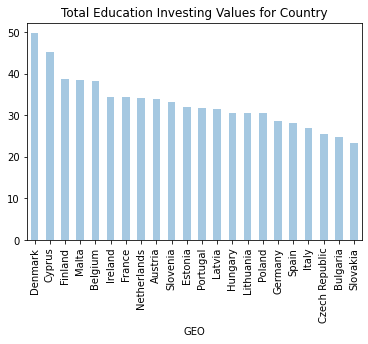

In [91]:
# Plotting Países que mais investiram em ed

totalsum = pivedu2.sum(axis = 1).sort_values(ascending=False)
totalsum.plot(kind='bar', style = 'b', alpha= 0.4,
              title = "Total Education Investing Values for Country") 

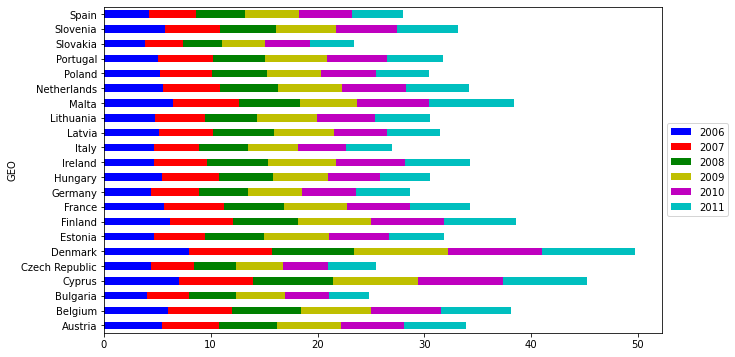

In [83]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu2.plot (kind = 'barh',
                  stacked = True,
                  color = my_colors, figsize=(10, 6))
ax.legend (loc = 'center left', bbox_to_anchor = (1, .5))

